In [362]:
%matplotlib inline

import math as mt
from modsim import *

In [363]:
radian = UNITS.radian
m = UNITS.meter
s = UNITS.second
g = UNITS.gram
kg = g*1000
degree = UNITS.degree

In [364]:
rho_ash = 710 * kg/m**3
                          #using european ash via Engineering Toolbox
rho_air = 1.225 * kg/m**3
                    
knight_mass = 71 #* kg
pull_strength = 76 * kg
strength = 744.8 * kg * m / s**2
                          #RoyMurray
                      
                   
horse_mass = 500 #* kg
                         #via medievalwarefare.info
field_length = 36.6 * m
lance_length = 3.04 * m
                          #10 ft
heavy_armor = 50 #* kg,  
medium_armor = 40 #* kg,
light_armor = 30 #* kg,                     
lance_angle = 30 * degree
max_speed = 13.4 * m / s
og_acceleration = 9.78 * m/s**2
og_armor_mass = 40 * kg

In [365]:
masses = Condition(heavy_armor = 50, 
                    medium_armor = 40,
                    light_armor = 30, 
                      knight_mass = 71,
                      horse_mass = 500,)
                   
                  

def make_system(condition):
    unpack(condition)
    mass_light = knight_mass+horse_mass+light_armor
    mass_medium = knight_mass+horse_mass+medium_armor
    mass_heavy = knight_mass+horse_mass+heavy_armor
    
    return System(mass_light=mass_light, mass_medium=mass_medium, mass_heavy=mass_heavy)


In [366]:
mass_system = make_system(masses)
mass_system

,value
mass_light,601
mass_medium,611
mass_heavy,621


In [367]:
angle_sweep = linspace(.8 * degree, 7.8 * degree, 35)
velocity_sweep = linspace(8 * m/s, 13.4 * m/s, 20)

In [391]:
condition = Condition(heavy_armor = 50, 
                      medium_armor = 30,
                      light_armor = 10, 
                      knight_mass = 71,
                      horse_mass = 500,
                      angle_min = .8 * degree,
                      angle_max = 7.8 * degree,
                      velocity_min = 8 * m/s,
                      velocity_max = 13.4 * m/s)
                   
                  

def make_system(condition):
    unpack(condition)
    
    mass_light = knight_mass+horse_mass+light_armor
    mass_medium = knight_mass+horse_mass+medium_armor
    mass_heavy = knight_mass+horse_mass+heavy_armor
    distance = 18
    lance_length = 3.04
    angle_sweep = linspace(.8 * degree, 7.8 * degree, 35)
    velocity_sweep = linspace(8, 13.4, 20)
    max_force = 2000 
    rider_force = 745
    
    
    return System(mass_light = mass_light, mass_medium = mass_medium, mass_heavy = mass_heavy, distance = distance,
                 lance = lance_length, angles = angle_sweep, velocities = velocity_sweep, max_force = max_force,
                 rider = rider_force)

In [392]:
system = make_system(condition)
system

,value
mass_light,581
mass_medium,601
mass_heavy,621
distance,18
lance,3.04
angles,"[0.8 degree, 1.0058823529411764 degree, 1.2117..."
velocities,"[8.0, 8.28421052632, 8.56842105263, 8.85263157..."
max_force,2000
rider,745


In [370]:
mass_l = system.mass_light 
mass_m = system.mass_medium
mass_h = system.mass_heavy
distance = system.distance
velocity_array = system.velocities


In [371]:
def sweep_velocity10(velocity_array, mass_l):

    sweep = SweepSeries()
    for velocity in velocity_array:
        #print(velocity)
        force_lance = mass_l * ((velocity**2)/(2*distance))
        sweep[velocity] = force_lance
       
    return sweep

In [372]:
def sweep_velocity30(velocity_array, mass_m):

    sweep = SweepSeries()
    for velocity in velocity_array:
        #print(velocity)
        force_lance = mass_m * ((velocity**2)/(2*distance))
        sweep[velocity] = force_lance
       
    return sweep

In [373]:
def sweep_velocity50(velocity_array, mass_h):

    sweep = SweepSeries()
    for velocity in velocity_array:
        #print(velocity)
        force_lance = mass_h * ((velocity**2)/(2*distance))
        sweep[velocity] = force_lance
        #plot(sweep)
               
    return sweep



In [374]:
lsweep = sweep_velocity10(velocity_array, mass_l)
print(lsweep)

8.000000     1032.888889
8.284211     1107.581991
8.568421     1184.882351
8.852632     1264.789969
9.136842     1347.304845
9.421053     1432.426978
9.705263     1520.156368
9.989474     1610.493016
10.273684    1703.436922
10.557895    1798.988086
10.842105    1897.146507
11.126316    1997.912185
11.410526    2101.285122
11.694737    2207.265315
11.978947    2315.852767
12.263158    2427.047476
12.547368    2540.849443
12.831579    2657.258667
13.115789    2776.275149
13.400000    2897.898889
dtype: float64


In [375]:
msweep = sweep_velocity30(velocity_array, mass_m)

Saving figure to file armorstuff.pdf


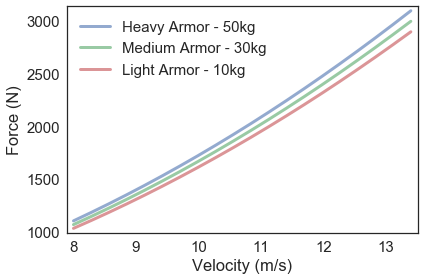

In [482]:
heavy_sweep = sweep_velocity50(velocity_array, mass_h)
newfig()
def plot_armor():
    
    plot(heavy_sweep, label='Heavy Armor - 50kg')
    plot(msweep, label='Medium Armor - 30kg')
    plot(lsweep, label='Light Armor - 10kg')

    decorate(xlabel='Velocity (m/s)',
             ylabel='Force (N)',
             #title='Force Measurements of Different Armor Weights vs. Velocity'
            )
    
plot_armor()
plt.tight_layout()
savefig('armorstuff.pdf')

In [377]:
angle_sweep = linspace(.8, 7.8, 35)

In [378]:
def sweep_parameters(velocity_array, angle_array):
    frame = SweepFrame(columns = angle_array)
    for angle in angle_array:
        frame[angle] = sweep_velocity10(velocity_array, mass_l)
    return frame

In [379]:
frame = sweep_parameters(velocity_array, angle_array)

In [453]:
def plot_angle_sweep(frame):
    lance = system.lance
    for angle in frame.columns:
        series = frame[angle]
        for velocity in series.index:
            forces = series[velocity]
            #print('x')
            #print(lance*angle*forces)
            #print('y')
            #print(forces)
            #plot(forces*lance*mt.sin(np.deg2rad(angle)),'r-')
            #plot(mt.sin(np.deg2rad(angle)), forces)
            #plot(angle, (forces*lance*mt.sin(np.deg2rad(angle))), 'r-')
            plot(angle, forces*lance, 'ro')

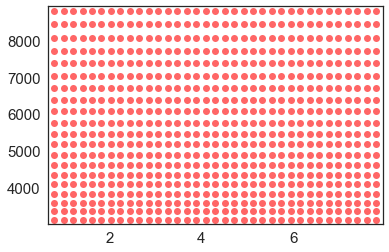

In [454]:
ugh = plot_angle_sweep(frame)


In [382]:
max_f = system.max_force

In [389]:
def sweep_max(angle_array, max_f):
    
    sweep = SweepSeries()
    for angle in angle_array:
        #print(velocity)
        shatter = max_f / (1-mt.sin(np.deg2rad(angle)))
        sweep[angle] = shatter
        plot(sweep)
               
    return sweep

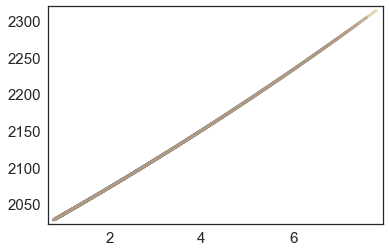

In [390]:
lancer = sweep_max(angle_array, max_f)

In [410]:
rider = system.rider
lance = system.lance

In [411]:
def sweep_min_torque(angle_array, rider):
    lance = system.lance
    sweep = SweepSeries()
    for angle in angle_array:
        #print(velocity)
        
        min_torque = lance * mt.sin(np.deg2rad(angle)) * (rider / (1-mt.sin(np.deg2rad(angle))))
        sweep[angle] = min_torque
        plot(sweep)
               
    return sweep

In [413]:
def sweep_max_torque(angle_array, max_f):
    lance = system.lance
    sweep = SweepSeries()
    for angle in angle_array:
        #print(velocity)
        
        max_torque = lance * mt.sin(np.deg2rad(angle)) * (max_f / (1-mt.sin(np.deg2rad(angle))))
        sweep[angle] = max_torque
        plot(sweep)
               
    return sweep

Saving figure to file torquethresholds.pdf


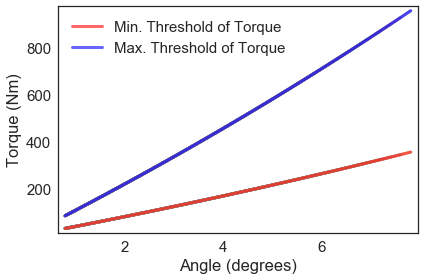

In [483]:
def plot_torque():
    
    min_torque = sweep_min_torque(angle_array, rider)
    max_torque = sweep_max_torque(angle_array, max_f)
    plot(min_torque, 'r-', label='Min. Threshold of Torque')
    plot(max_torque, 'b-', label='Max. Threshold of Torque')

    decorate(xlabel='Angle (degrees)',
             ylabel='Torque (Nm)',
             #title='Force Measurements of Different Armor Weights vs. Velocity'
            )
    
plot_torque()
plt.tight_layout()
savefig('torquethresholds.pdf')

## 

In [444]:
def upper_bound():
    
    for angle in angle_array:
        f_h = Series()
        torque = Series()
        f_h[angle] = 2000/(1-mt.sin(np.deg2rad(angle)))
        tourqe[angle] = f_h[angle]*lance*mt.sin(np.deg2rad(angle))
        plot(f_h, 'r-')
    

In [451]:
def lower_bound():
    for angle in angle_array:
        f_l = Series()
        torque_min = rider * 0.5
        f_l[angle] = torque_min/(lance*mt.sin(np.deg2rad(angle)))
        plot(f_l, 'b-')
        

Saving figure to file forceresults.pdf


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


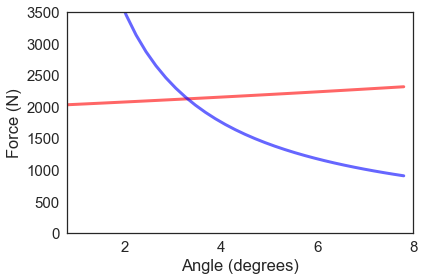

In [489]:
def plot_results():
    
    upper = upper_bound()
    lower = lower_bound()
    plot(upper, 'r-', label='Upper Bound of Force')
    plot(lower, 'b-', label='Lower Bound of Force')
    xlim([0.8, 8])
    ylim([0, 3500])
    
    
    decorate(xlabel='Angle (degrees)',
             ylabel='Force (N)'
             #loc[best]
             #title='Force Measurements of Different Armor Weights vs. Velocity'
            )
    
plot_results()
plt.tight_layout()
savefig('forceresults.pdf')